<a href="https://colab.research.google.com/github/MuhammadBilal848/Deep-Learning-Practice/blob/main/C.N.N%20Implementation%20On%20CIFAR%20(70%25%20Accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [45]:
(xtrain,ytrain), (xtest,ytest) = keras.datasets.cifar10.load_data()

In [46]:
xtrain.shape , xtest.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

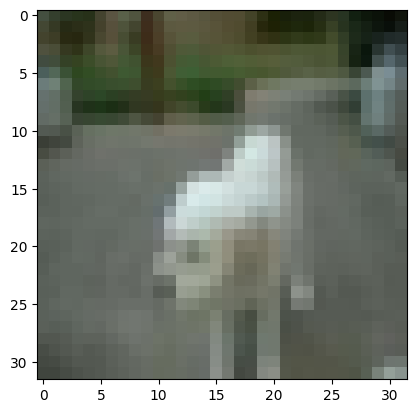

In [47]:
plt.imshow(xtrain[np.random.randint(low = 1,high = 40000)])

In [48]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [49]:
def class_label(xtrain_or_xtest,ytrain_or_ytest,label_no):
  plt.imshow(xtrain_or_xtest[label_no])
  plt.xlabel(classes[ytrain_or_ytest[label_no][0]])  

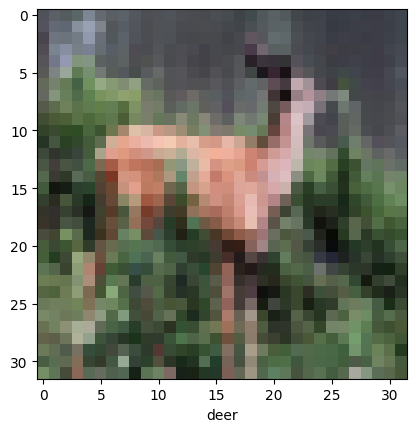

In [50]:
class_label(xtest,ytest,2030)

In [51]:
xtrain = xtrain/255
xtest = xtest/255

In [52]:
model = keras.Sequential([
              # first conv layer
              keras.layers.Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
              keras.layers.MaxPool2D(2,2),
              # second conv layer
              keras.layers.Conv2D(filters = 64 , kernel_size = (3,3) , activation = 'relu'),
              keras.layers.MaxPool2D(2,2),
              # flatten
              keras.layers.Flatten(),
              # FC layers
              keras.layers.Dense(40,activation = 'relu'),
              keras.layers.Dense(10,activation = 'softmax')
])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'Accuracy')
model.fit(xtrain,ytrain,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 1.5174 - Accuracy: 0.4522
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1757 - Accuracy: 0.5857
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0297 - Accuracy: 0.6407
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9462 - Accuracy: 0.6718
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8809 - Accuracy: 0.6948
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8298 - Accuracy: 0.7130
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7887 - Accuracy: 0.7280
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7501 - Accuracy: 0.7405
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7194 - Accuracy: 0.7501
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.689

In [53]:
model.evaluate(xtest,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.8891 - Accuracy: 0.6971


[0.8891061544418335, 0.6970999836921692]

In [54]:
ypred = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


(2, None, array([1], dtype=uint8))

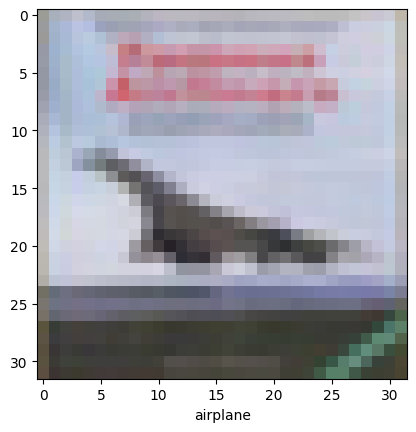

In [55]:
np.argmax(ypred[np.random.randint(low = 1,high = 500)]) , class_label(xtest,ytest,ytest[np.random.randint(low = 1,high = 500)][0]) , ytest[np.random.randint(low = 1,high = 500)]

In [56]:
ypred = [np.argmax(a) for a in ypred]

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72      1000
           1       0.82      0.81      0.82      1000
           2       0.52      0.66      0.58      1000
           3       0.57      0.47      0.51      1000
           4       0.63      0.66      0.64      1000
           5       0.64      0.57      0.61      1000
           6       0.77      0.77      0.77      1000
           7       0.76      0.72      0.74      1000
           8       0.82      0.77      0.79      1000
           9       0.78      0.78      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [59]:
cm = confusion_matrix(ytest,ypred)

<Axes: >

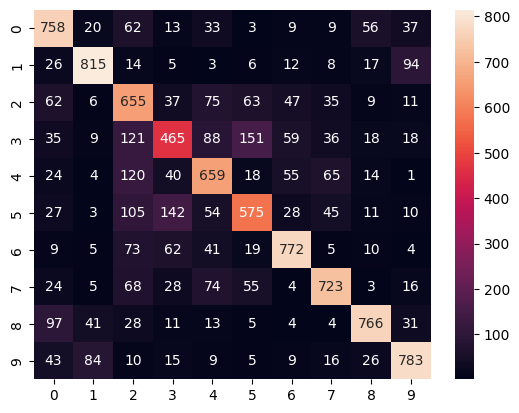

In [60]:
sns.heatmap(cm,annot = True,fmt='d')